In [1]:
%matplotlib inline
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
from scipy import stats
from scipy.stats import entropy
from scipy.optimize import minimize

## Exercise 1M21

A store is visited by $n$ customers on a given day. 

The number of customers that make a purchase $Y$ is distributed as $Bin(n, \theta)$, where 
$\theta$ is the probability that a customer makes a purchase. Assume we know $\theta$ and the prior for $n$ is $Pois(4.5)$.

-  Use PyMC3 to compute the posterior distribution of for all combinations of  $n$ and $\theta$. 
- Y is a member of 0, 5, 10 and theta 0.2 and 0.5
- Use az.plot_posterior to plot the results in a single plot.
- Summarize the effect of $Y$ and $\theta$ on the posterior.


Y=0 means no purchasing customers. This means we have an empty cash register at the end of the day.

### Breaking down the problem
- Overall the problem will have us plot 6 combinations of all the Y and theta value posterior distributions
- Let's start with one single distribution of Y=0 and theta=0.2

In [4]:
# Make the model
# We are given a theta=0.2 (for the first approach)
# Our Y is 0 (for the first approach)
Y = 0

with pm.Model() as model:
    # Specificy our knowns
    θ = 0.2
    
    # specify our prior, being the Poisson distribution of 4.5
    # n is the average # number of customers per day
    # n, our unobserved value, is a random variable from the distribution
    n = pm.Poisson("n", 4.5)
    
    # Specify our likelihood distribution
    y_obs = pm.Binomial("y_obs", n=n, p=θ, observed=Y)
    
    # sample from our posterior
    idata = pm.sample(1000, return_inferencedata=True)
    

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
The number of effective samples is smaller than 25% for some parameters.


<AxesSubplot:title={'center':'n'}>

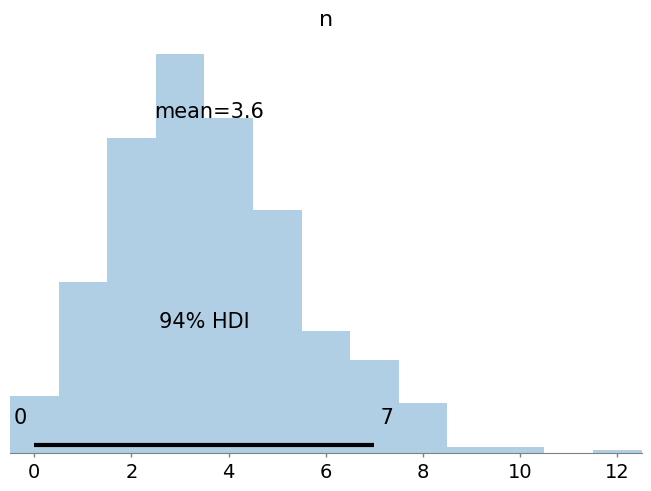

In [8]:
az.plot_posterior(idata)

I believe Highest and "Credibility Interval" or "Prediction Interval"

## Plot the Posterior Distribution for $\theta$ of .5

In [9]:
# Make the model
# We are given a theta=0.2 (for the first approach)
# Our Y is 0 (for the first approach)
Y = 0

with pm.Model() as model:
    # Specificy our knowns
    θ = 0.5
    
    # specify our prior, being the Poisson distribution of 4.5
    # n is the average # number of customers per day
    # n, our unobserved value, is a random variable from the distribution
    n = pm.Poisson("n", 4.5)
    
    # Specify our likelihood distribution
    y_obs = pm.Binomial("y_obs", n=n, p=θ, observed=Y)
    
    # sample from our posterior
    idata = pm.sample(1000, return_inferencedata=True)
    

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.


<AxesSubplot:title={'center':'n'}>

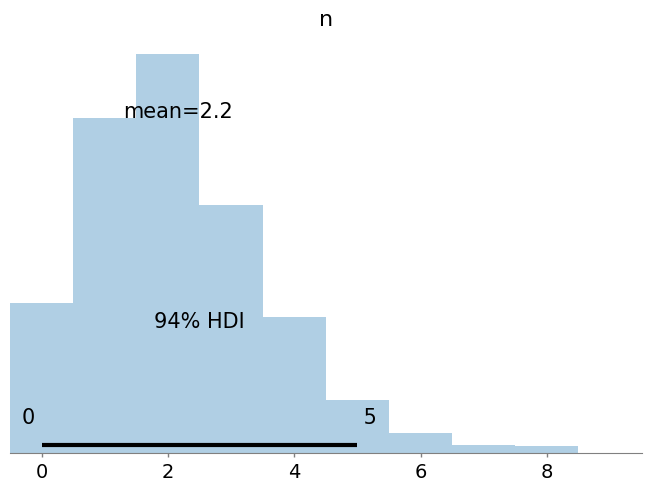

In [10]:
az.plot_posterior(idata)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.


<AxesSubplot:title={'center':'n'}>

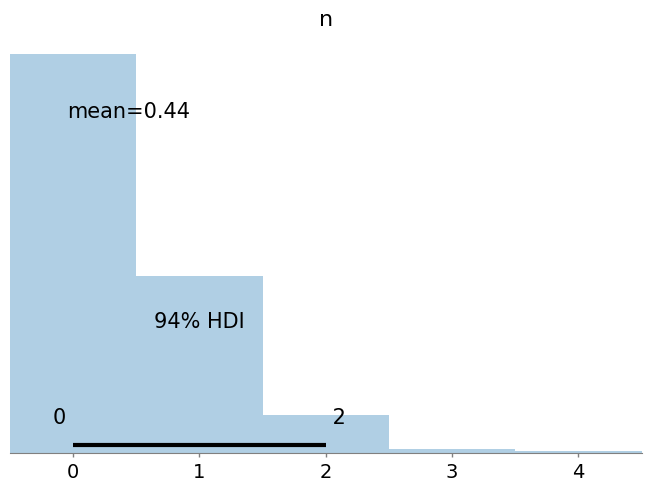

In [11]:
# Make the model
# We are given a theta=0.2 (for the first approach)
# Our Y is 0 (for the first approach)
Y = 0

with pm.Model() as model:
    # Specificy our knowns
    θ = 0.9
    
    # specify our prior, being the Poisson distribution of 4.5
    # n is the average # number of customers per day
    # n, our unobserved value, is a random variable from the distribution
    n = pm.Poisson("n", 4.5)
    
    # Specify our likelihood distribution
    y_obs = pm.Binomial("y_obs", n=n, p=θ, observed=Y)
    
    # sample from our posterior
    idata = pm.sample(1000, return_inferencedata=True)

az.plot_posterior(idata)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.


<AxesSubplot:title={'center':'n'}>

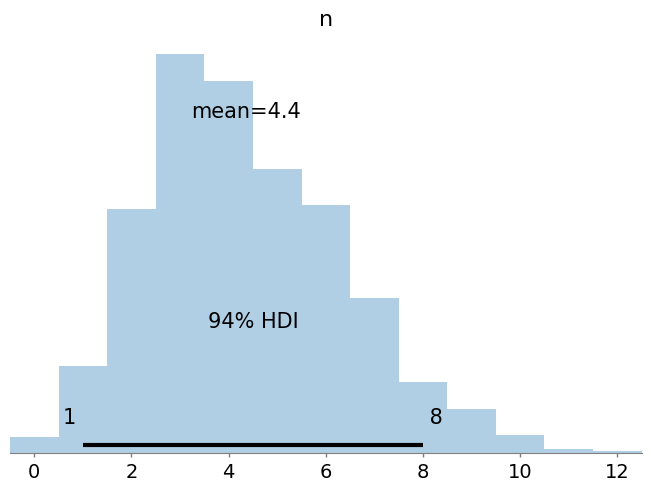

In [12]:
# Make the model
# We are given a theta=0.2 (for the first approach)
# Our Y is 0 (for the first approach)
Y = 0

with pm.Model() as model:
    # Specificy our knowns
    θ = 0.05
    
    # specify our prior, being the Poisson distribution of 4.5
    # n is the average # number of customers per day
    # n, our unobserved value, is a random variable from the distribution
    n = pm.Poisson("n", 4.5)
    
    # Specify our likelihood distribution
    y_obs = pm.Binomial("y_obs", n=n, p=θ, observed=Y)
    
    # sample from our posterior
    idata = pm.sample(1000, return_inferencedata=True)

az.plot_posterior(idata)

## Let's explore Y=5 and theta=0.2
- The first attempt here is Y=5 with a sampling start of 6
- The second posterior here is np.ones(5) with no sampling start
- The two distributions differ slightly, but why?
- Is it due only to the shifted sampling start? Or is there something else?

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.


<AxesSubplot:title={'center':'n'}>

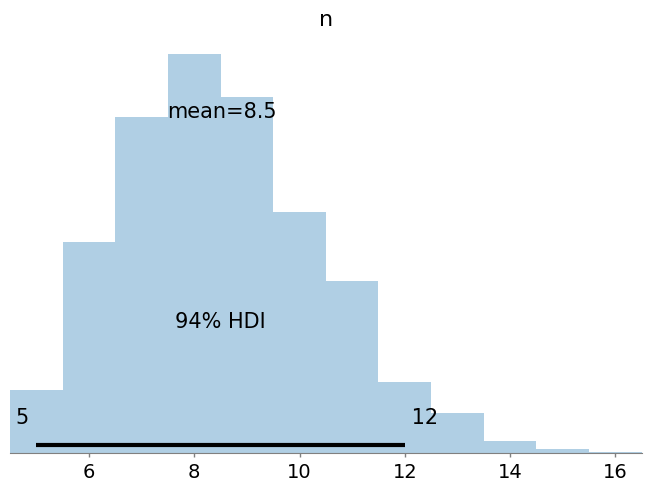

In [27]:
# Make the model
# We are given a theta=0.2 (for the first approach)
# Our Y is 0 (for the first approach)
# 5 purchasing customers
Y = 5

with pm.Model() as model:
    # Specificy our knowns
    θ = 0.2
    
    # specify our prior, being the Poisson distribution of 4.5
    # n is the average # number of customers per day
    # n, our unobserved value, is a random variable from the distribution
    n = pm.Poisson("n", 4.5) # limiting the domain
    
    # Specify our likelihood distribution
    y_obs = pm.Binomial("y_obs", n=n, p=θ, observed=Y)
    
    # sample from our posterior
    idata = pm.sample(1000, return_inferencedata=True, start={"n": 6})

az.plot_posterior(idata)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.


<AxesSubplot:title={'center':'n'}>

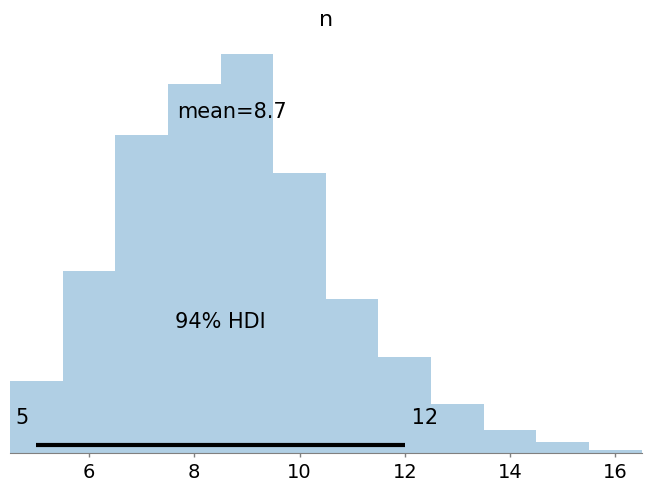

In [32]:
# Make the model
# We are given a theta=0.2 (for the first approach)
# Our Y is 0 (for the first approach)
# 5 purchasing customers
Y = np.array(5)

with pm.Model() as model:
    # Specificy our knowns
    θ = 0.2
    
    # specify our prior, being the Poisson distribution of 4.5
    # n is the average # number of customers per day
    # n, our unobserved value, is a random variable from the distribution
    n = pm.Poisson("n", 4.5) # limiting the domain
    
    # Specify our likelihood distribution
    y_obs = pm.Binomial("y_obs", n=n, p=θ, observed=Y)
    
    # sample from our posterior
    idata_5 = pm.sample(1000, return_inferencedata=True, start={"n": 10})

az.plot_posterior(idata_5)

array([[<AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'n'}>]], dtype=object)

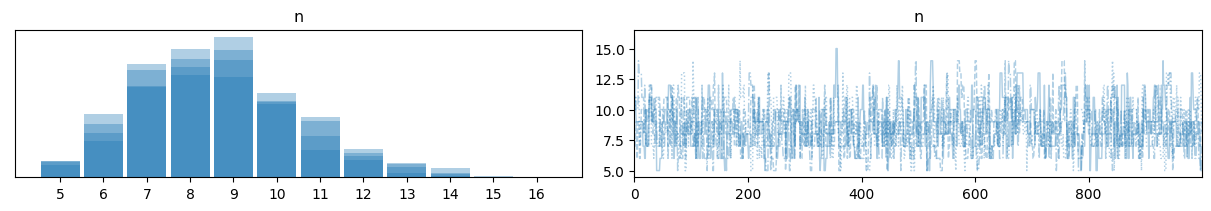

In [31]:
az.plot_trace(idata)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


array([[<AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'n'}>]], dtype=object)

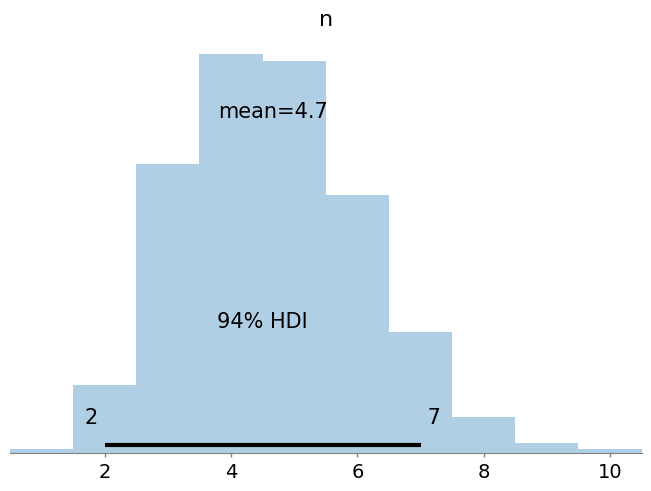

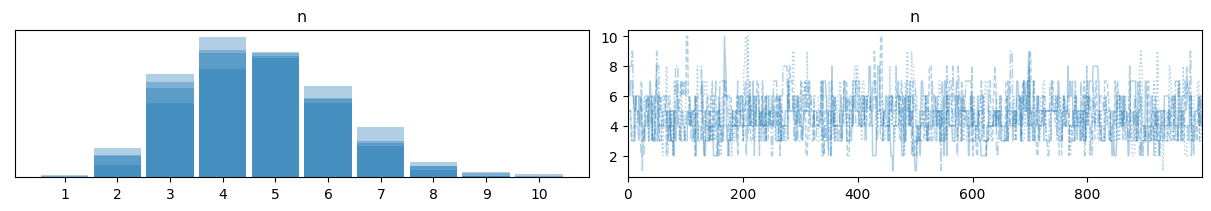

In [33]:
# Make the model
# We are given a theta=0.2 (for the first approach)
# Our Y is 0 (for the first approach)
# 5 purchasing customers
Y = np.ones(5) # [1, 1, 1, 1, 1]

with pm.Model() as model:
    # Specificy our knowns
    θ = 0.2
    
    # specify our prior, being the Poisson distribution of 4.5
    # n is the average # number of customers per day
    # n, our unobserved value, is a random variable from the distribution
    n = pm.Poisson("n", 4.5) # limiting the domain
    
    # Specify our likelihood distribution
    y_obs = pm.Binomial("y_obs", n=n, p=θ, observed=Y)
    
    # sample from our posterior
    idata_np = pm.sample(1000, return_inferencedata=True)

az.plot_posterior(idata_np)
az.plot_trace(idata_np)

array([[<AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'n'}>]], dtype=object)

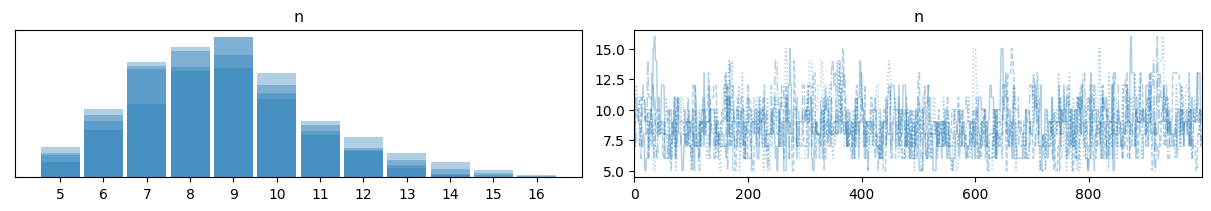

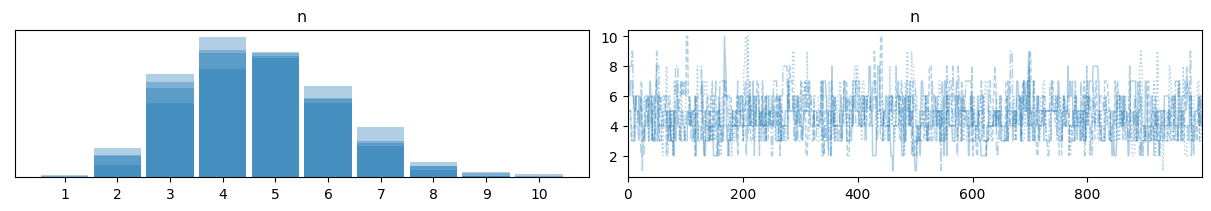

In [34]:
# Size by side
az.plot_trace(idata_5)
az.plot_trace(idata_np)

- MCMC sampling is a random walk to select samples from the posterior distribution
- In some situations, we might begin with a value where the markov-chain doesn't know where to go.
- If the starting point is impossible, then the markov-chain doesn't know where to go next
- The `start` argument helped us only sample from possible values, since we provided a start greater than Y=5 

## Exploration with Prior Truncation
- `truncated_poisson = pm.Truncated("truncated_poisson", n, lower=6, upper=20)` is in a later version of PyMC than 3

In [20]:
import numpy as np

In [21]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [22]:
[1, 1, 1, 1, 1]

[1, 1, 1, 1, 1]

## Let's experiment with comparing the two binomial distributions
- Comparing `Y=5` and `Y=np.ones(5)`

In [40]:
with pm.Model() as model:
    n = pm.DiscreteUniform("n", lower=2, upper=10)
    
    y_5 = pm.Binomial("five", n=n, p=.2, observed=5)
    y_n = pm.Binomial("numpy", n=n, p=.2, observed=np.ones(5))

    idata = pm.sample(1000, return_inferencedata=True)



Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [42]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

array([[<AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'n'}>]], dtype=object)

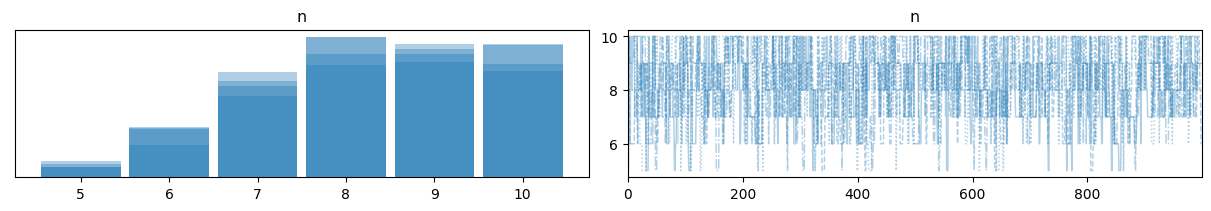

In [41]:
az.plot_trace(idata)

<AxesSubplot:title={'center':'n'}>

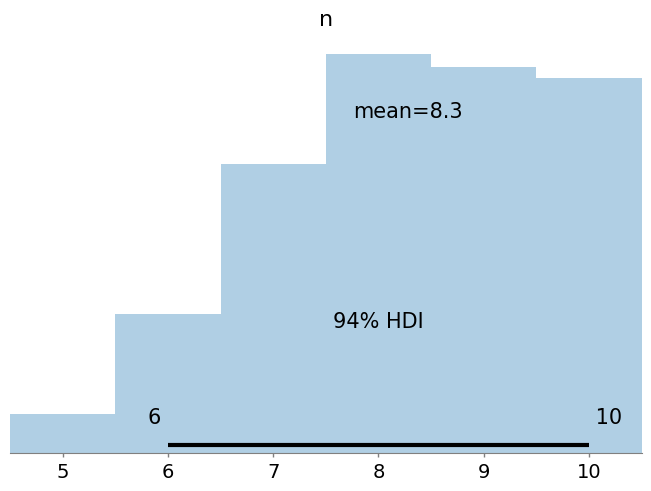

In [44]:
az.plot_posterior(idata)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.


<AxesSubplot:title={'center':'n'}>

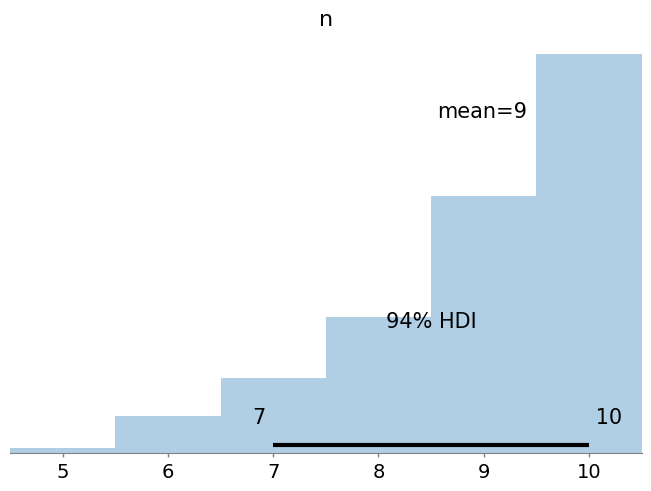

In [45]:
# Y=5
with pm.Model() as model:
    n = pm.DiscreteUniform("n", lower=2, upper=10)
    
    y_5 = pm.Binomial("five", n=n, p=.2, observed=5)

    idata1 = pm.sample(1000, return_inferencedata=True)

az.plot_posterior(idata1)

Multiprocess sampling (4 chains in 4 jobs)
Metropolis: [n]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.
The number of effective samples is smaller than 25% for some parameters.


<AxesSubplot:title={'center':'n'}>

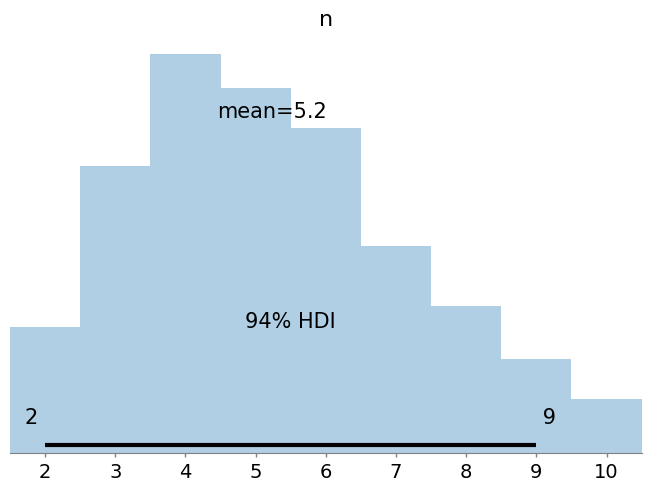

In [46]:
# Y=np.ones(5)
with pm.Model() as model:
    n = pm.DiscreteUniform("n", lower=2, upper=10)
    
    y_numpy = pm.Binomial("numpy", n=n, p=.2, observed=np.ones(5))

    idata2 = pm.sample(1000, return_inferencedata=True)

az.plot_posterior(idata2)

array([[<AxesSubplot:title={'center':'n'}>,
        <AxesSubplot:title={'center':'n'}>]], dtype=object)

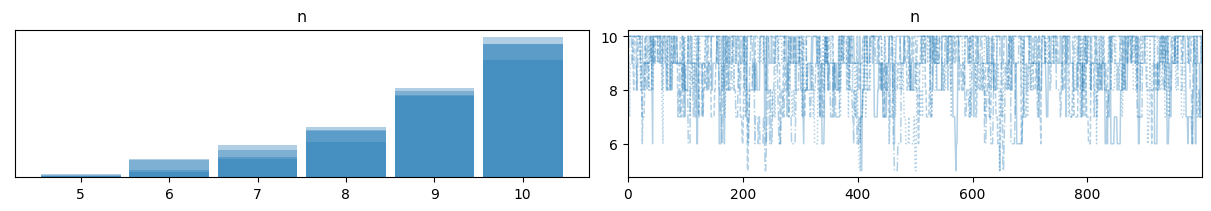

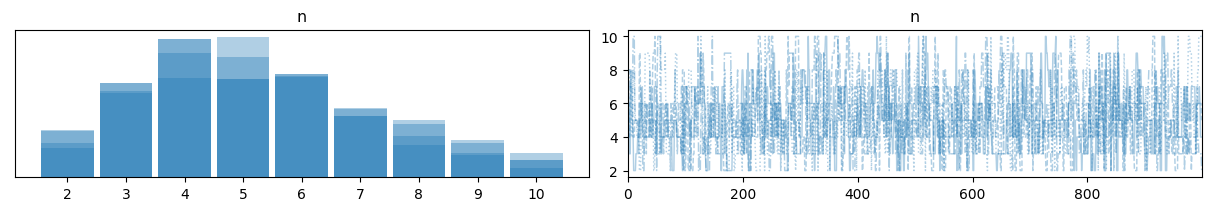

In [47]:
az.plot_trace(idata1)
az.plot_trace(idata2)

### We remain confused about the difference between `Y=5` and `Y=np.ones(5)` in the likelihood distribution.
`

In [50]:
from scipy.stats import stats
from scipy.stats import binom

In [63]:
# Exploring Y=5
# Theta of 0.2
n_5 = binom(9, 0.2).rvs(10_000)

In [64]:
# Theta of .2
n_np = binom(5, 0.2).rvs(10_000)

(array([1.292e+03, 3.076e+03, 3.033e+03, 0.000e+00, 1.747e+03, 6.490e+02,
        0.000e+00, 1.740e+02, 2.600e+01, 3.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

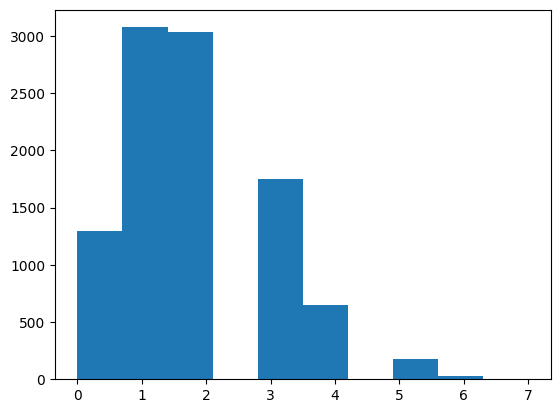

In [65]:
plt.hist(n_5)

(array([3.266e+03, 0.000e+00, 4.078e+03, 0.000e+00, 2.067e+03, 0.000e+00,
        5.120e+02, 0.000e+00, 7.400e+01, 3.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

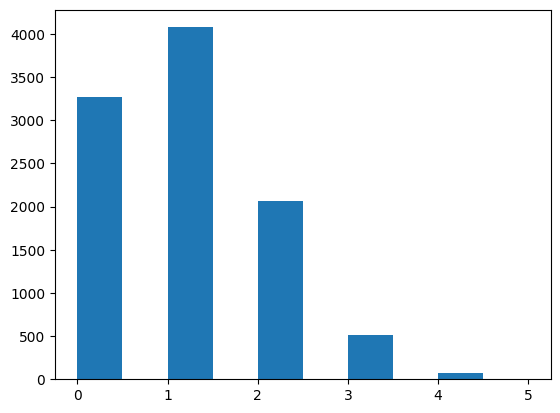

In [66]:
plt.hist(n_np)